In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
df = pd.read_csv('/content/reg_cars_selling.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [111]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [112]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [113]:
df.selling_price.describe()

,selling_price
count,8.128000e+03
mean,6.382718e+05
std,8.062534e+05
min,2.999900e+04
25%,2.549990e+05
50%,4.500000e+05
75%,6.750000e+05
max,1.000000e+07


# **1 cleaning**


In [114]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [115]:
df.drop_duplicates(inplace=True)

In [116]:
df.dropna(inplace=True)


In [117]:
df.isnull().sum()


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [118]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [119]:
df.describe()

,year,selling_price,km_driven,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,5.434271
std,3.897402,5.235504e+05,5.870328e+04,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


Text(0.5, 0, 'Factors')

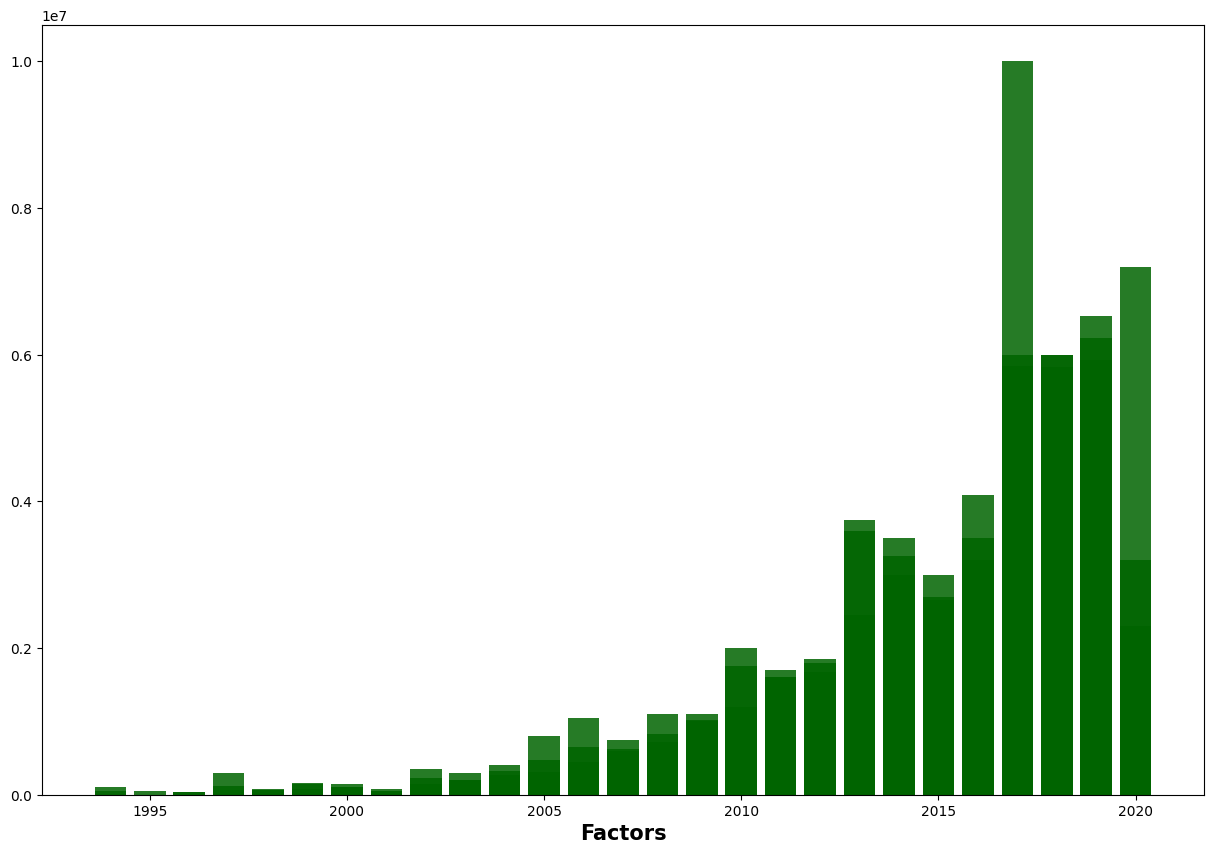

In [121]:
# كيف يرتبط عمر السيارة (year) بسعر البيع
plt.figure(figsize = (15,10))
plt.bar( df.year , df.selling_price , color = 'darkgreen', alpha = 0.85)

plt.xlabel('Factors', fontsize = 15, weight = 'bold')

<ipython-input-122-77f992af0a39>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="year", y="selling_price", hue="fuel", ci=None)


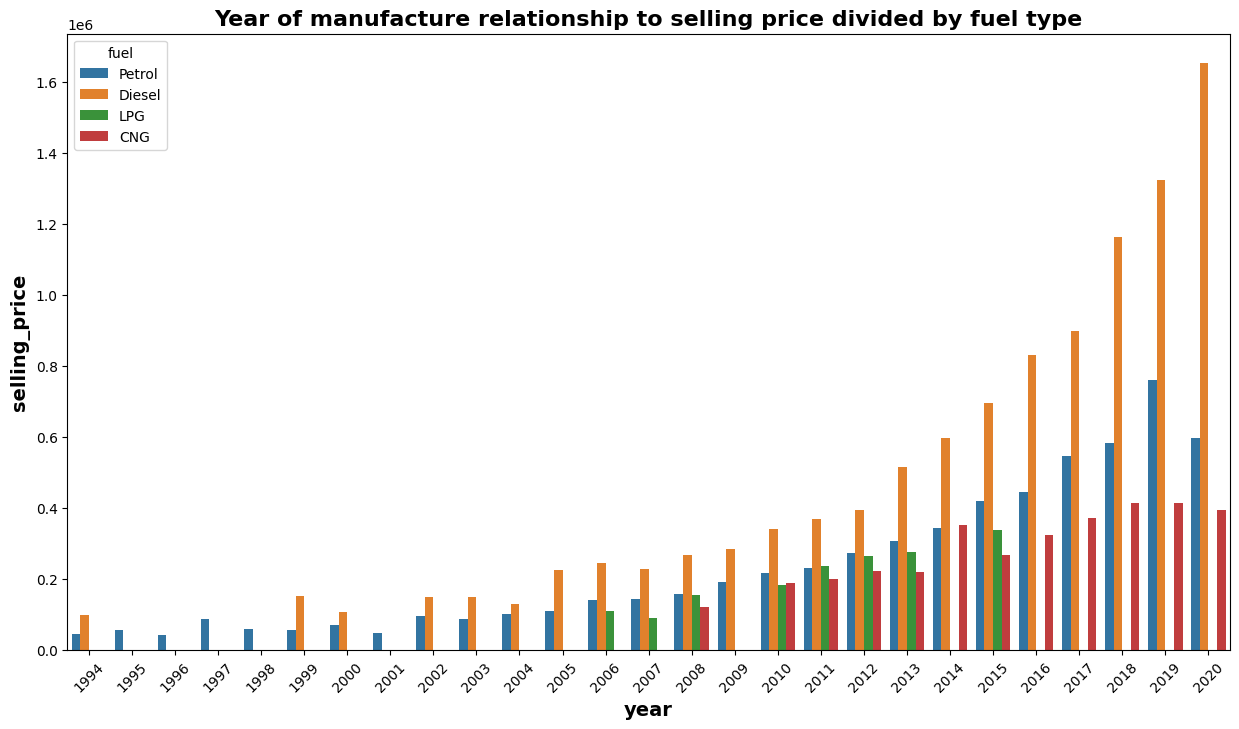

In [122]:
# كيف يرتبط عمر السيارة (year) بسعر البيع
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x="year", y="selling_price", hue="fuel", ci=None)

plt.xlabel("year", fontsize=14, weight="bold")
plt.ylabel("selling_price", fontsize=14, weight="bold")
plt.title("Year of manufacture relationship to selling price divided by fuel type", fontsize=16, weight="bold")
plt.xticks(rotation=45)
plt.legend(title="fuel")
plt.show()

In [123]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<ipython-input-124-f2dc05de778a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="transmission", y="selling_price", palette="Set2")


<Axes: xlabel='transmission', ylabel='selling_price'>

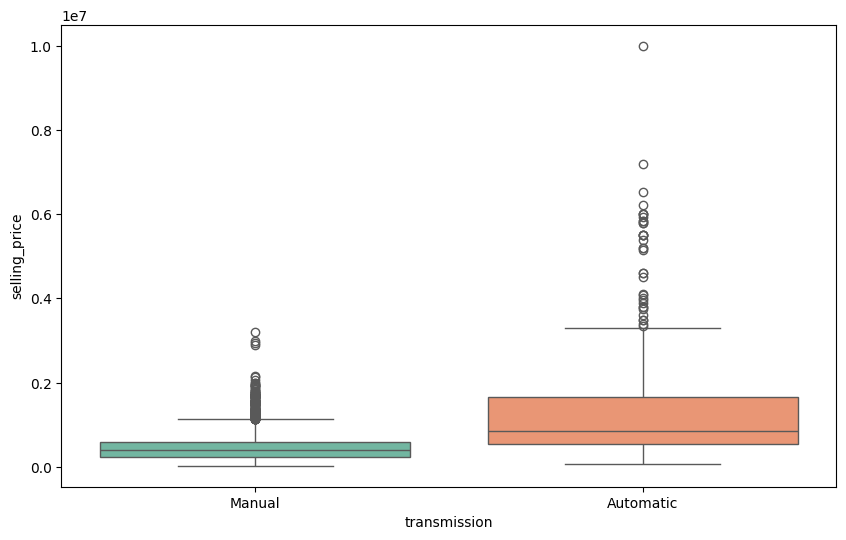

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="transmission", y="selling_price", palette="Set2")

In [125]:
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

In [126]:
df['max_power'].value_counts()

,count
max_power,
74.0,324
88.5,193
46.3,158
67.0,152
67.1,141
...,...
161.0,1
60.2,1
134.0,1


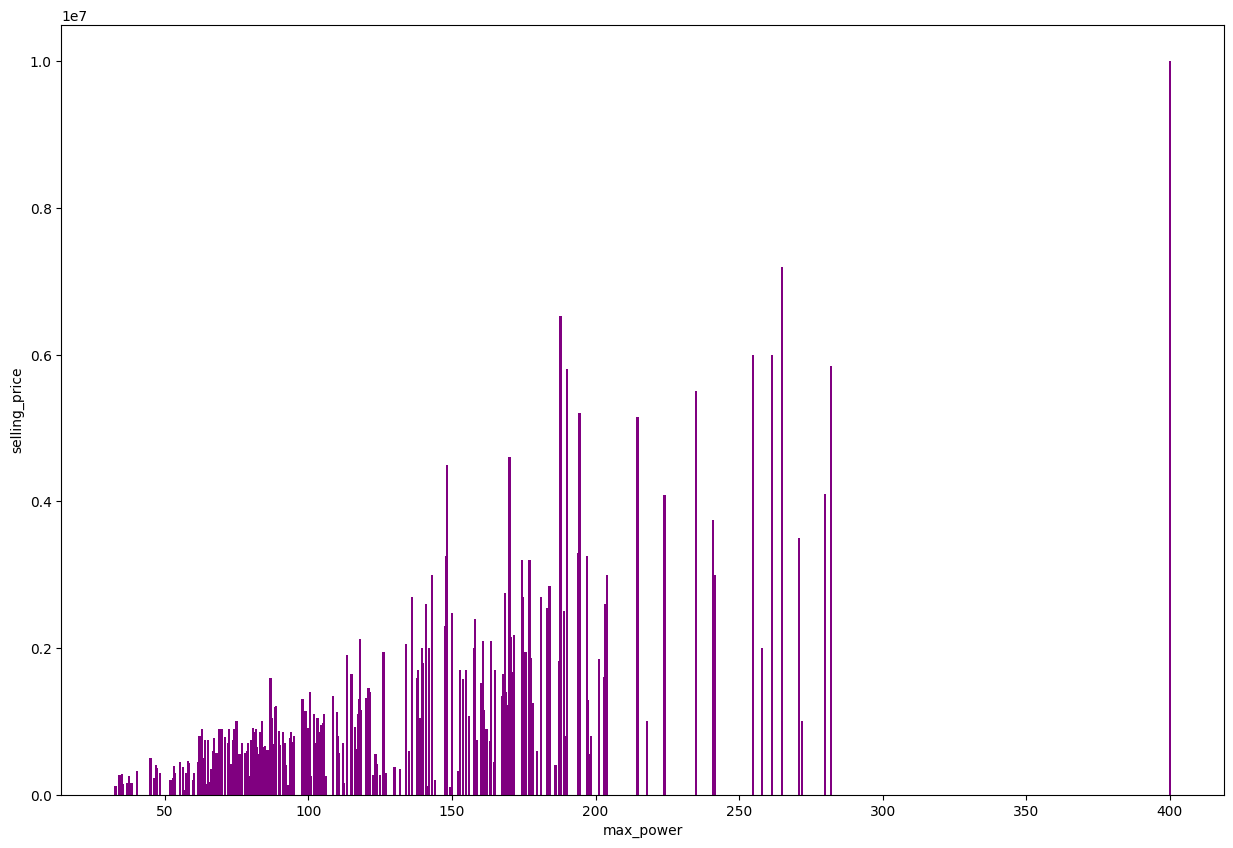

In [127]:
plt.figure(figsize=(15, 10))

plt.bar(df['max_power'] ,df['selling_price'] , color = 'purple')
plt.xlabel('max_power')
plt.ylabel('selling_price')
plt.show()

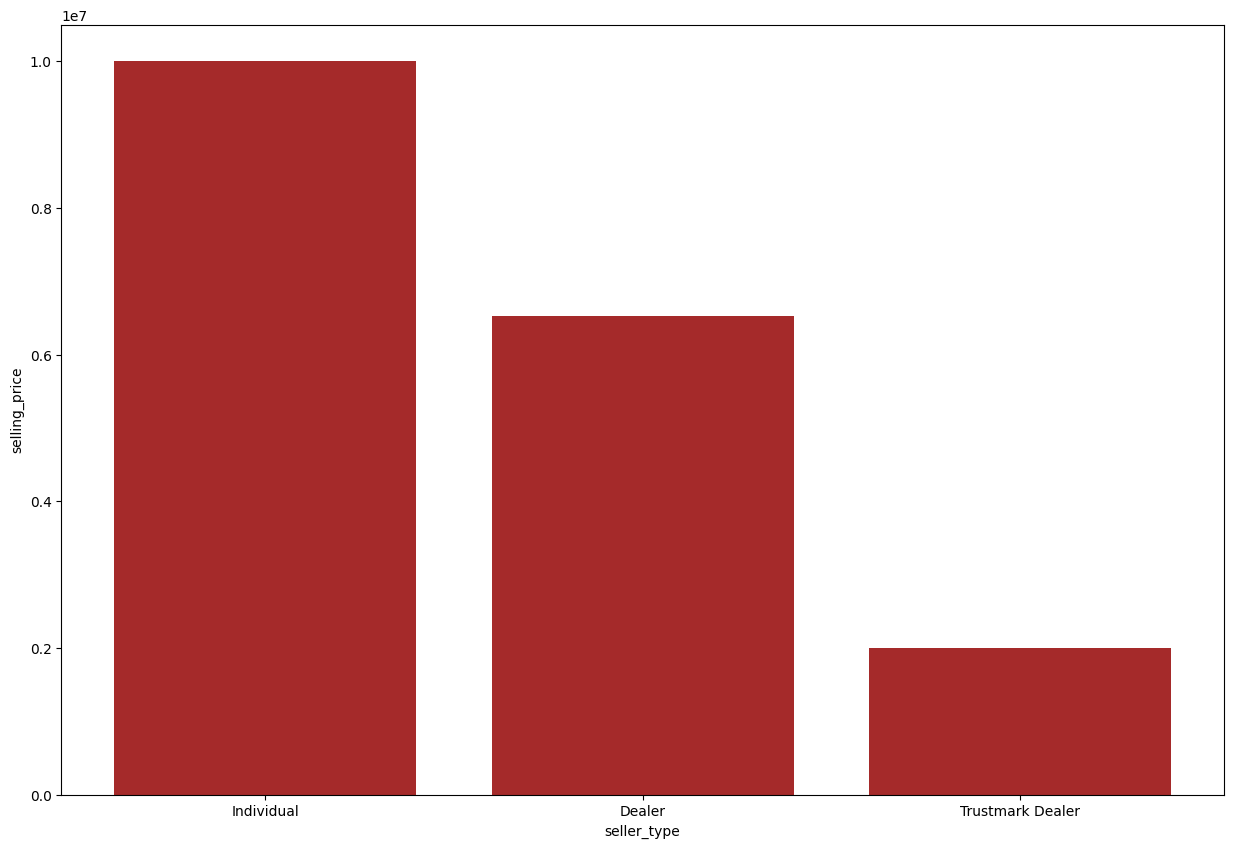

In [128]:
plt.figure(figsize=(15, 10))

plt.bar(df['seller_type'] ,df['selling_price'] , color = 'brown')
plt.xlabel('seller_type')
plt.ylabel('selling_price')
plt.show()

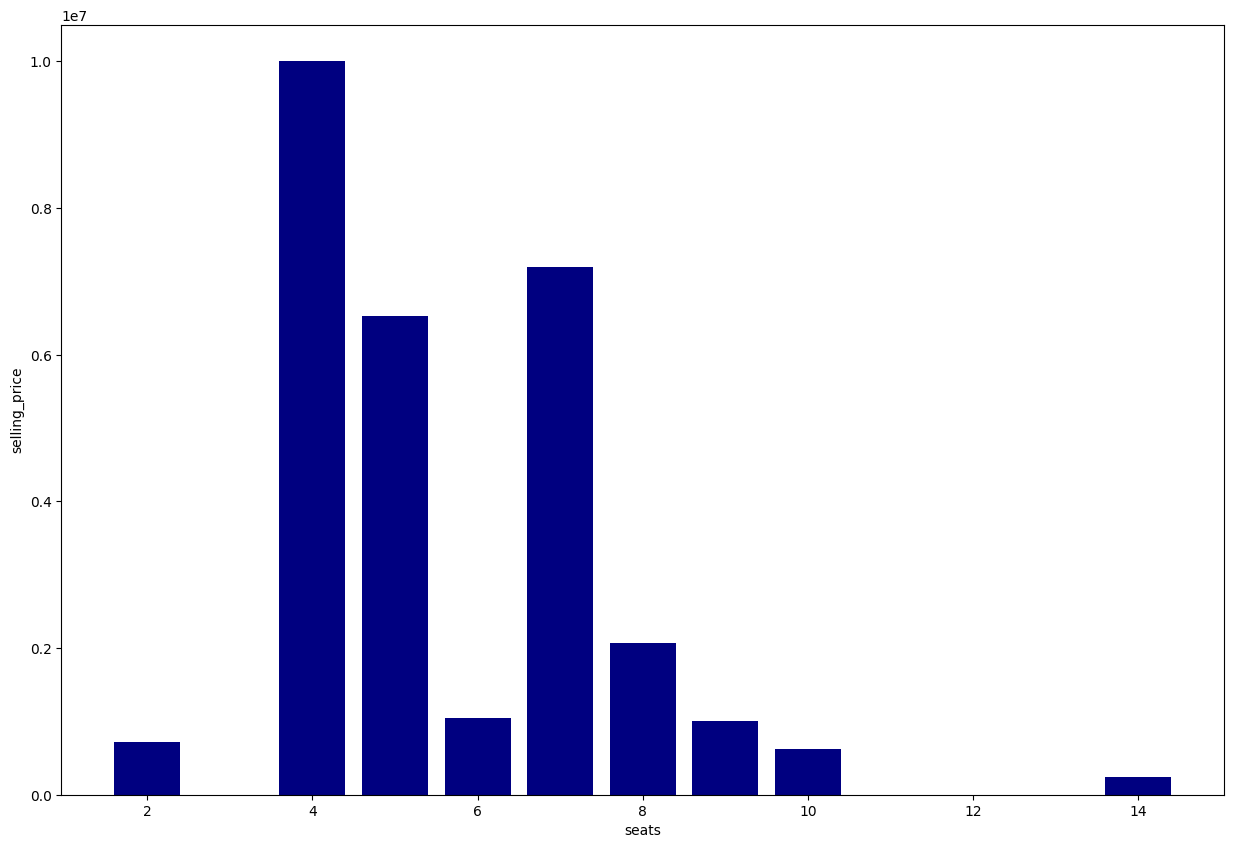

In [129]:
plt.figure(figsize=(15, 10))
plt.bar(df['seats'] ,df['selling_price'] , color = 'navy')
plt.xlabel('seats')
plt.ylabel('selling_price')
plt.show()

<ipython-input-130-d307e5d72084>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['seats'], palette='mako')


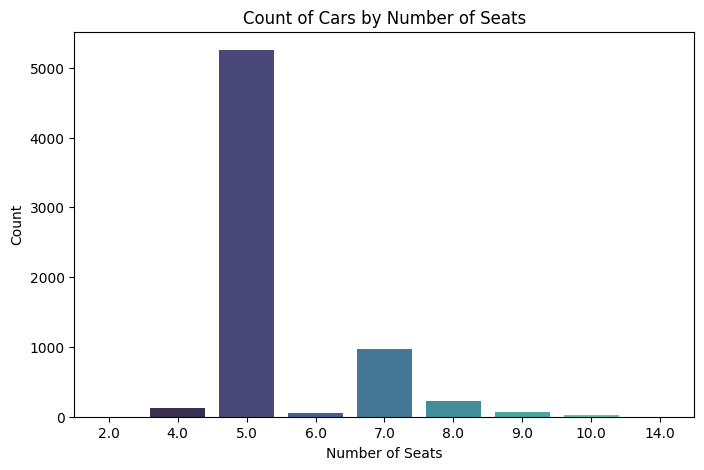

In [130]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['seats'], palette='mako')

plt.title("Count of Cars by Number of Seats")
plt.ylabel("Count")
plt.xlabel("Number of Seats")
plt.show()

# **pre-procising**

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 734.7+ KB


In [132]:
df.describe()

,year,selling_price,km_driven,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,400.000000,14.000000


In [133]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.10,90Nm@ 3500rpm,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73,219.7Nm@ 1500-2750rpm,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [134]:
df.loc[df['max_power'] == df['max_power'].max()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0 kmpl,1969 CC,400.0,640Nm@ 1740rpm,4.0


In [135]:
df['selling_price_INR'] = df['selling_price']

In [136]:
df.drop('selling_price' , axis=1 , inplace=True)

In [137]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_INR
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74.00,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,130000


In [138]:

df['mileage'] = df['mileage'].str.replace(r' kmpl$', '', regex=True)
df['mileage'] = df['mileage'].str.replace(r' km/kg$', '', regex=True)
df['mileage'] = df['mileage'].astype(float)  # تحويله إلى رقم

In [139]:
df['engine'] = df['engine'].str.replace(' CC$', '')


In [140]:
df['engine'] = df['engine'].str.replace(' CC', '')

In [141]:
df['engine'] = df['engine'].astype(float)  # تحويله إلى رقم


In [142]:
df

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_INR
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,260000
8122,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5.0,475000
8123,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,320000
8124,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,135000


In [143]:
df['engine'].info()

<class 'pandas.core.series.Series'>
Index: 6717 entries, 0 to 8125
Series name: engine
Non-Null Count  Dtype  
--------------  -----  
6717 non-null   float64
dtypes: float64(1)
memory usage: 105.0 KB


In [144]:
# معالجة عمود العزم torque
df['torque_Nm'] = df['torque'].astype(str)


In [145]:
df['torque_Nm'].head()

,torque_Nm
0,190Nm@ 2000rpm
1,250Nm@ 1500-2500rpm
2,"12.7@ 2,700(kgm@ rpm)"
3,22.4 kgm at 1750-2750rpm
4,"11.5@ 4,500(kgm@ rpm)"


In [146]:
# معالجة عمود العزم torque
def extract_torque(value):
    if pd.isna(value): return None
    value = str(value).lower().strip()
    matches = re.findall(r'([\d\.]+)\s*(nm|kgm)?', value, re.IGNORECASE)
    torque_values = []
    for match in matches:
        torque_value = float(match[0])
        unit = match[1].lower() if match[1] else 'nm'
        if unit == "kgm":
            torque_value *= 9.80665
        torque_values.append(torque_value)
    if torque_values:
        return sum(torque_values) / len(torque_values)
    return None

In [147]:
df['torque_Nm'] = df['torque_Nm'].apply(extract_torque)


In [148]:
df['torque_Nm'].head()

,torque_Nm
0,1095.000000
1,1416.666667
2,238.233333
3,1573.222987
4,171.833333


In [149]:
df.drop(columns=['torque'], inplace=True)

In [150]:
# df_encoded for modiling
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,torque_Nm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000,1095.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000,1416.666667
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000,238.233333
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000,1573.222987
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000,171.833333


In [151]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,torque_Nm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000,1095.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000,1416.666667
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000,238.233333
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000,1573.222987
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000,171.833333


In [152]:
df_car_numeric = df.copy()

In [153]:
df_car_numeric['brand'] = df_car_numeric['name'].apply(lambda x: str(x).split()[0])  # استخراج أول كلمة كعلامة تجارية
df_car_numeric.drop(columns=['name'], inplace=True)  # حذف الاسم الأصلي

In [154]:
df_car_numeric.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,torque_Nm,brand
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000,1095.000000,Maruti
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000,1416.666667,Skoda
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000,238.233333,Honda
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000,1573.222987,Hyundai
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000,171.833333,Maruti


In [155]:
df_car_numeric['brand'].value_counts()

,count
brand,
Maruti,2089
Hyundai,1214
Mahindra,709
Tata,633
Honda,361
Ford,353
Toyota,324
Chevrolet,216
Renault,206


In [156]:
df_car_numeric.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,torque_Nm,brand
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000,1095.000000,Maruti
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000,1416.666667,Skoda
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000,238.233333,Honda
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000,1573.222987,Hyundai
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000,171.833333,Maruti


In [157]:
df_car_numeric[ df_car_numeric['selling_price_INR'].max() == df_car_numeric['selling_price_INR'] ]

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,torque_Nm,brand
170,2017,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.0,4.0,10000000,1190.0,Volvo


In [158]:
df_car_numeric_analysis = df_car_numeric.copy()

# **LabelEncoder**

In [159]:
from sklearn.preprocessing import LabelEncoder

In [160]:
encoder   = LabelEncoder()
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner', 'brand']


In [161]:
# تطبيق التحويل على كل الأعمدة (النصية فقط)
for col in df_car_numeric[categorical_columns]:
    if df_car_numeric[col].dtype == 'object':  # التأكد أن العمود نصي
        df_car_numeric[col] = encoder.fit_transform(df_car_numeric[col])  # تحويل القيم النصية إلى أرقام

In [162]:
df_car_numeric.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,torque_Nm,brand
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,450000,1095.000000,20
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,370000,1416.666667,26
2,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,158000,238.233333,10
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0,225000,1573.222987,11
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0,130000,171.833333,20


In [163]:
df_car_numeric.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,torque_Nm,brand
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,450000,1095.000000,20
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,370000,1416.666667,26
2,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,158000,238.233333,10
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0,225000,1573.222987,11
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0,130000,171.833333,20


In [164]:
df_car_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               6717 non-null   int64  
 1   km_driven          6717 non-null   int64  
 2   fuel               6717 non-null   int64  
 3   seller_type        6717 non-null   int64  
 4   transmission       6717 non-null   int64  
 5   owner              6717 non-null   int64  
 6   mileage            6717 non-null   float64
 7   engine             6717 non-null   float64
 8   max_power          6717 non-null   float64
 9   seats              6717 non-null   float64
 10  selling_price_INR  6717 non-null   int64  
 11  torque_Nm          6717 non-null   float64
 12  brand              6717 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 734.7 KB


In [165]:
df_car_numeric['brand'].nunique()

31

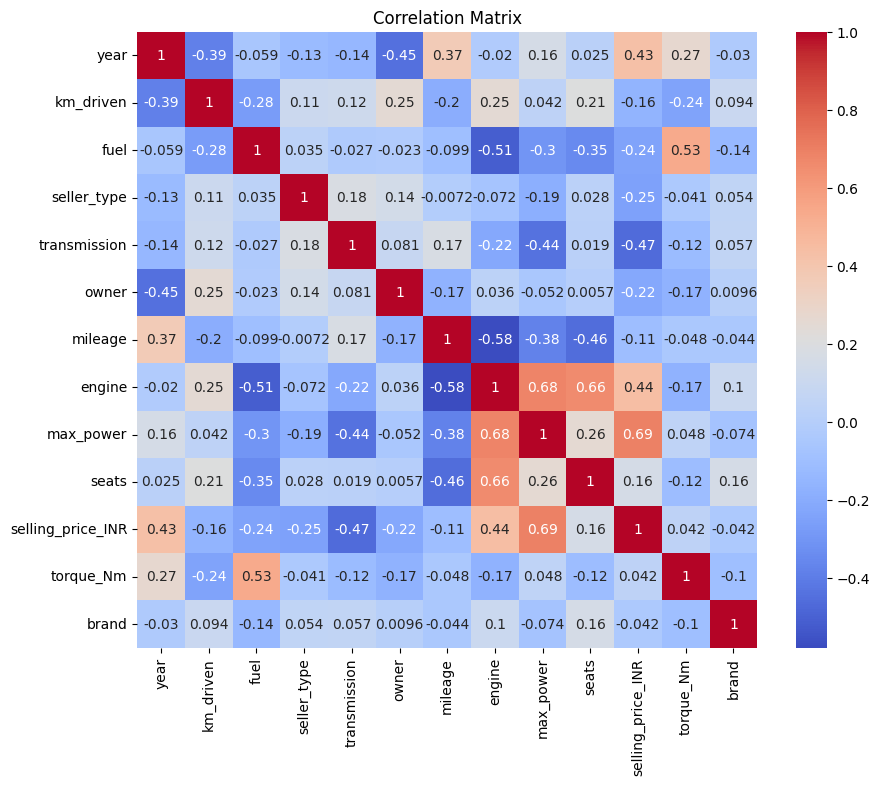

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# حساب مصفوفة الارتباط
correlation_matrix = df_car_numeric.corr()

# رسم مصفوفة الارتباط
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [167]:
df_car_numeric.isna().sum()

,0
year,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0
max_power,0
seats,0


In [168]:
df_car_numeric.describe()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,torque_Nm,brand
count,6717.000000,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6717.000000,6.717000e+03,6717.000000,6717.000000
mean,2013.611136,7.339834e+04,1.882835,0.904868,0.914396,0.881048,19.466585,1430.985857,87.766100,5.434271,5.263860e+05,1550.479541,17.723537
std,3.897402,5.870328e+04,1.001993,0.306814,0.279799,1.245956,4.048102,493.469198,31.724555,0.983805,5.235504e+05,516.999204,6.899060
min,1994.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,32.800000,2.000000,2.999900e+04,3.033333,0.000000
25%,2011.000000,3.800000e+04,1.000000,1.000000,1.000000,0.000000,16.800000,1197.000000,67.100000,5.000000,2.500000e+05,1152.500000,11.000000
50%,2014.000000,6.820300e+04,1.000000,1.000000,1.000000,0.000000,19.440000,1248.000000,81.830000,5.000000,4.200000e+05,1576.666667,20.000000
75%,2017.000000,1.000000e+05,3.000000,1.000000,1.000000,2.000000,22.500000,1498.000000,100.000000,5.000000,6.500000e+05,1976.500000,20.000000
max,2020.000000,2.360457e+06,3.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,400.000000,14.000000,1.000000e+07,3000.666667,30.000000


In [169]:
import seaborn as sns
import matplotlib.pyplot as plt


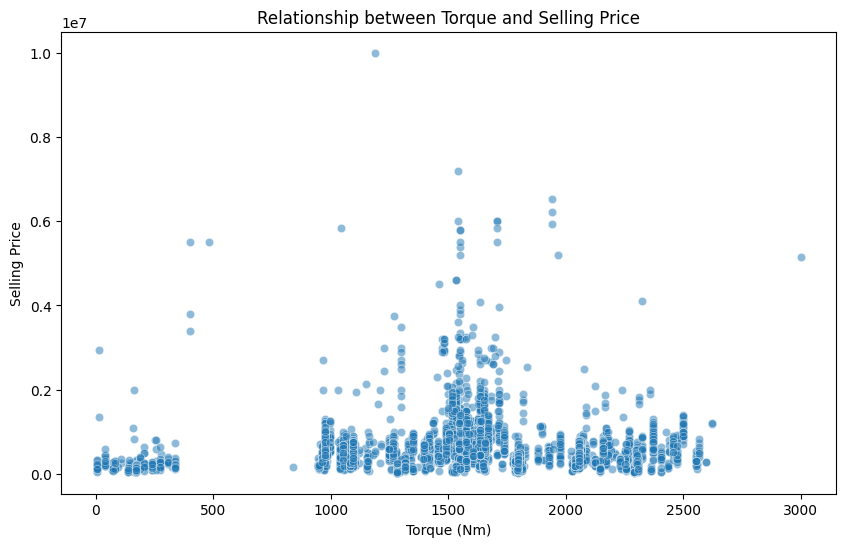

In [170]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_car_numeric['torque_Nm'], y=df_car_numeric['selling_price_INR'], alpha=0.5)
plt.xlabel("Torque (Nm)")
plt.ylabel("Selling Price")
plt.title("Relationship between Torque and Selling Price")
plt.show()


In [171]:
# حساب الارتباط
correlation = df_car_numeric[['torque_Nm', 'selling_price_INR']].corr()
print("Correlation between Torque and Selling Price:")
print(correlation)

Correlation between Torque and Selling Price:
                   torque_Nm  selling_price_INR
torque_Nm           1.000000           0.041546
selling_price_INR   0.041546           1.000000


In [172]:
#حذفها  علاقتها ضعيفة بل بعد حذفها تحسن النموذج
df_car_numeric.drop(columns=['torque_Nm'],axis=1 ,  inplace=True)

In [173]:
df_car_numeric.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,brand
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,450000,20
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,370000,26
2,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,158000,10
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0,225000,11
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0,130000,20


# **localoutlyersvactor **

In [174]:
df_car_numeric = pd.DataFrame(df_car_numeric)


In [175]:
from sklearn.neighbors import LocalOutlierFactor

In [176]:
lof = LocalOutlierFactor()

In [177]:
outlier_labels = lof.fit_predict(df_car_numeric)


In [178]:
df_car_numeric['outlier_labels'] = outlier_labels

In [179]:
(df_car_numeric['outlier_labels'] == -1 ).sum()

np.int64(146)

In [180]:
df_car_numeric

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,brand,outlier_labels
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,450000,20,1
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,370000,26,1
2,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,158000,10,1
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0,225000,11,1
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0,130000,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,50000,3,1,1,2,18.90,998.0,67.10,5.0,260000,20,1
8122,2014,80000,1,1,1,2,22.54,1396.0,88.73,5.0,475000,11,1
8123,2013,110000,3,1,1,0,18.50,1197.0,82.85,5.0,320000,11,1
8124,2007,119000,1,1,1,1,16.80,1493.0,110.00,5.0,135000,11,1


In [181]:
df_car_numeric = df_car_numeric[df_car_numeric['outlier_labels'] !=-1 ]
df_car_numeric.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,brand,outlier_labels
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,450000,20,1
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,370000,26,1
2,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,158000,10,1
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0,225000,11,1
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0,130000,20,1


In [182]:
df_car_numeric.drop(columns=['outlier_labels'], inplace=True)

<ipython-input-182-e72f03772c11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_car_numeric.drop(columns=['outlier_labels'], inplace=True)


In [183]:
df_car_numeric.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,brand
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0,450000,20
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0,370000,26
2,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0,158000,10
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0,225000,11
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0,130000,20


# **Data Analysis 📊**

In [184]:
df_car_numeric_analysis.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price_INR,torque_Nm,brand
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000,1095.000000,Maruti
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000,1416.666667,Skoda
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,158000,238.233333,Honda
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000,1573.222987,Hyundai
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000,171.833333,Maruti


<ipython-input-185-2eb69ed8f495>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='selling_price_INR', data=df_car_numeric_analysis, palette='Set2', width=0.8)


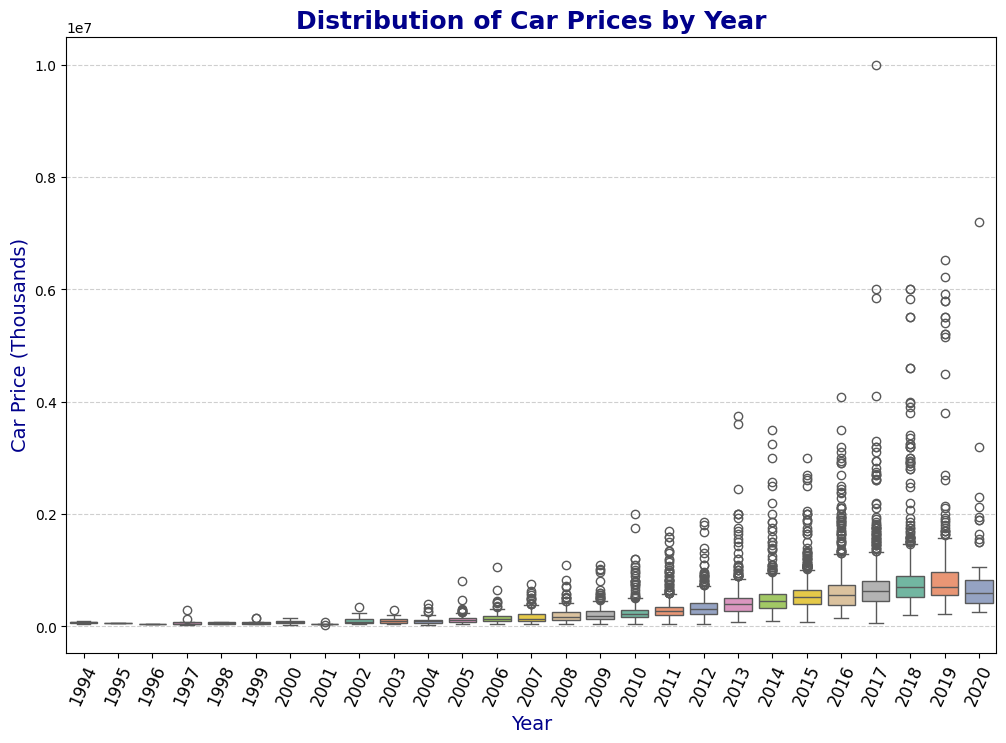

In [185]:
plt.figure(figsize=(12,8))
sns.boxplot(x='year', y='selling_price_INR', data=df_car_numeric_analysis, palette='Set2', width=0.8)
plt.title('Distribution of Car Prices by Year', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, color='darkblue')
plt.ylabel('Car Price (Thousands)', fontsize=14, color='darkblue')
plt.xticks(rotation=66, fontsize=12, color='black')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

In [186]:
df_grouped = df_car_numeric_analysis.groupby(['fuel', 'transmission'])['selling_price_INR'].mean().reset_index()
df_grouped

,fuel,transmission,selling_price_INR
0,CNG,Manual,3.176666e+05
1,Diesel,Automatic,1.790595e+06
2,Diesel,Manual,5.473985e+05
3,LPG,Manual,2.108857e+05
4,Petrol,Automatic,8.267419e+05
5,Petrol,Manual,3.382041e+05


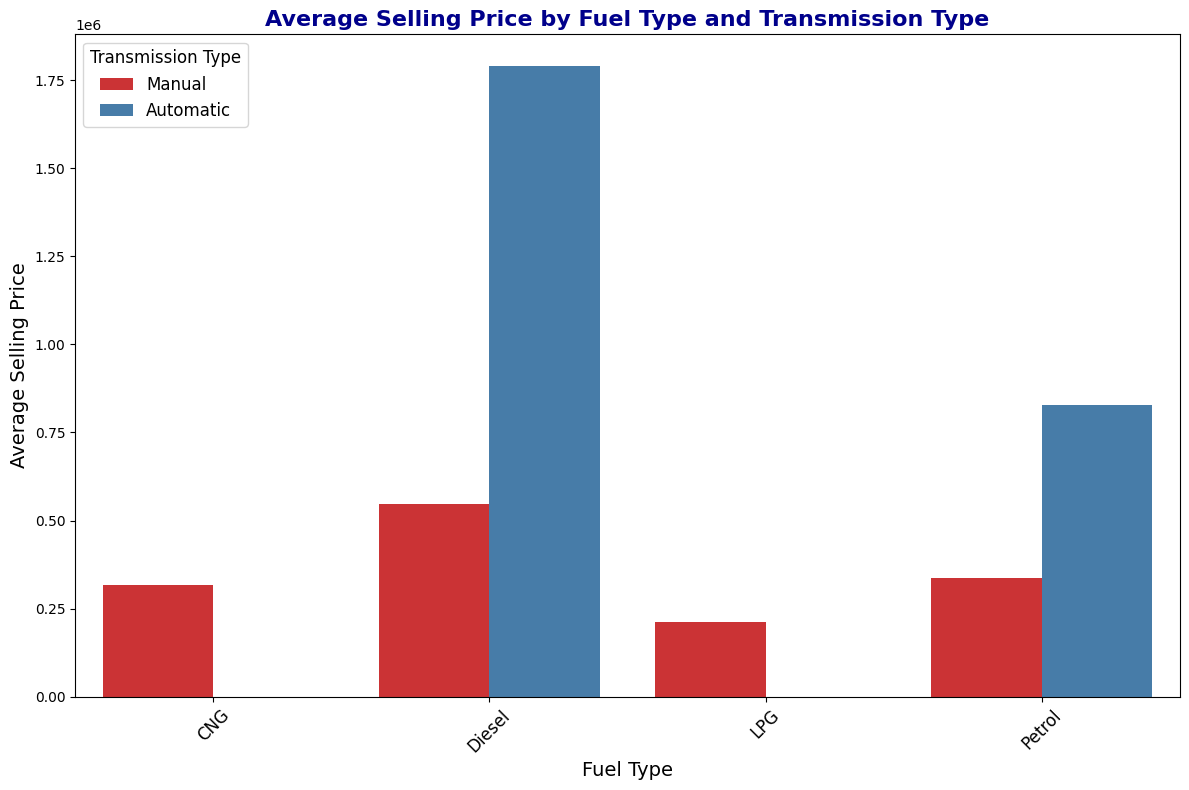

In [187]:
plt.figure(figsize=(12,8))
sns.barplot(x='fuel', y='selling_price_INR', hue='transmission', data=df_grouped, palette='Set1')
plt.title('Average Selling Price by Fuel Type and Transmission Type', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Transmission Type', title_fontsize=12, fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

<Axes: xlabel='fuel', ylabel='count'>

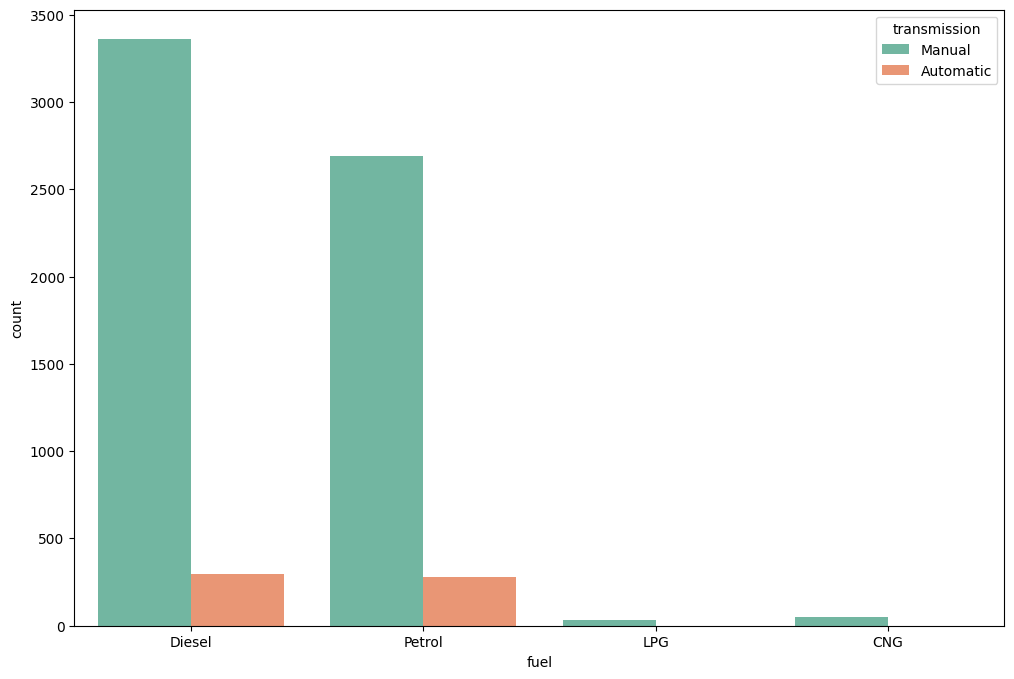

In [188]:
plt.figure(figsize=(12,8))
sns.countplot(data=df_car_numeric_analysis, x='fuel', hue='transmission', palette='Set2')

Text(0, 0.5, 'Selling Price')

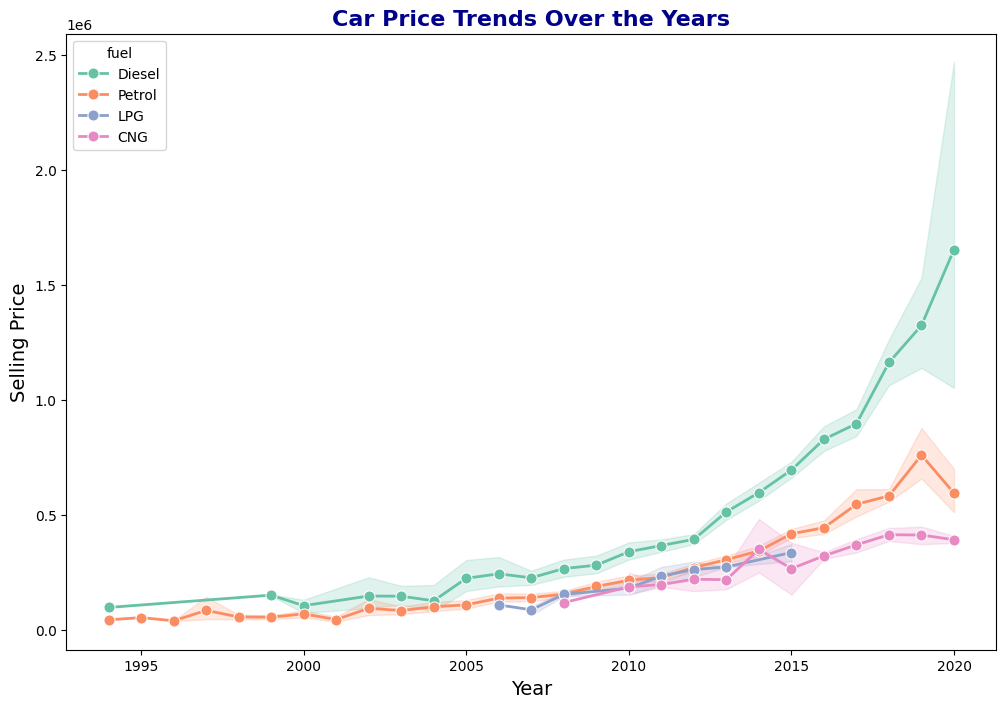

In [189]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_car_numeric_analysis, x='year', y='selling_price_INR', hue='fuel',marker='o', palette='Set2',linewidth=2, markersize=8)
plt.title('Car Price Trends Over the Years', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)


<ipython-input-190-7cf9519d3184>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_car_numeric_analysis, x='seats', y='selling_price_INR',palette='viridis', ci=None, edgecolor='black', linewidth=1.5)
<ipython-input-190-7cf9519d3184>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_car_numeric_analysis, x='seats', y='selling_price_INR',palette='viridis', ci=None, edgecolor='black', linewidth=1.5)


Text(0, 0.5, 'Average Selling Price')

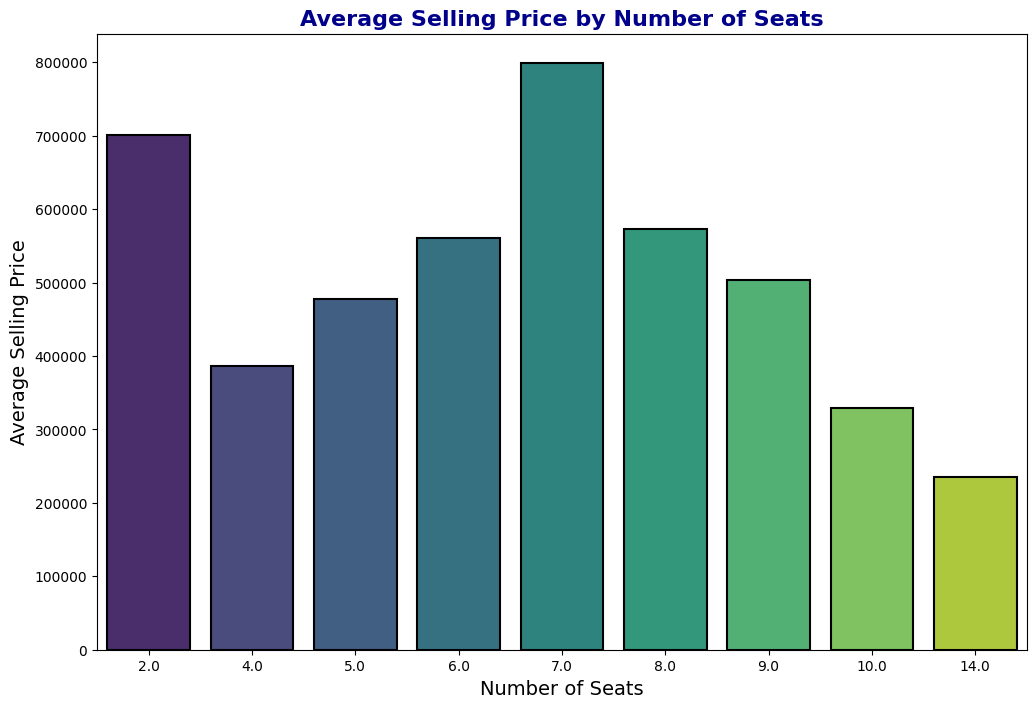

In [190]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_car_numeric_analysis, x='seats', y='selling_price_INR',palette='viridis', ci=None, edgecolor='black', linewidth=1.5)
plt.title('Average Selling Price by Number of Seats', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Number of Seats', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)

<ipython-input-191-11c674633389>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_car_numeric_analysis, x='year', y='selling_price_INR', palette='mako', ci=None, edgecolor='black', linewidth=1.5)
<ipython-input-191-11c674633389>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_car_numeric_analysis, x='year', y='selling_price_INR', palette='mako', ci=None, edgecolor='black', linewidth=1.5)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, '1994'),
  Text(1, 0, '1995'),
  Text(2, 0, '1996'),
  Text(3, 0, '1997'),
  Text(4, 0, '1998'),
  Text(5, 0, '1999'),
  Text(6, 0, '2000'),
  Text(7, 0, '2001'),
  Text(8, 0, '2002'),
  Text(9, 0, '2003'),
  Text(10, 0, '2004'),
  Text(11, 0, '2005'),
  Text(12, 0, '2006'),
  Text(13, 0, '2007'),
  Text(14, 0, '2008'),
  Text(15, 0, '2009'),
  Text(16, 0, '2010'),
  Text(17, 0, '2011'),
  Text(18, 0, '2012'),
  Text(19, 0, '2013'),
  Text(20, 0, '2014'),
  Text(21, 0, '2015'),
  Text(22, 0, '2016'),
  Text(23, 0, '2017'),
  Text(24, 0, '2018'),
  Text(25, 0, '2019'),
  Text(26, 0, '2020')])

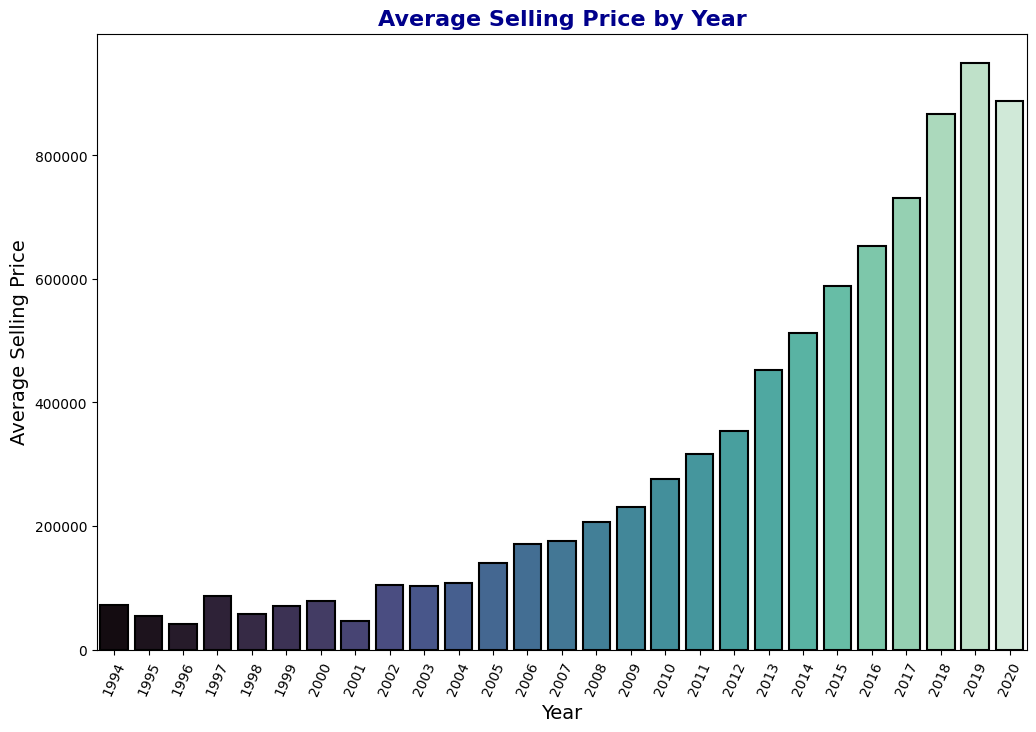

In [191]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_car_numeric_analysis, x='year', y='selling_price_INR', palette='mako', ci=None, edgecolor='black', linewidth=1.5)
plt.title('Average Selling Price by Year', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.xticks(rotation=66)

In [192]:
transmission_avg_price = df_car_numeric_analysis.groupby('transmission')['selling_price_INR'].mean()
transmission_avg_price

,selling_price_INR
transmission,
Automatic,1.322916e+06
Manual,4.518166e+05


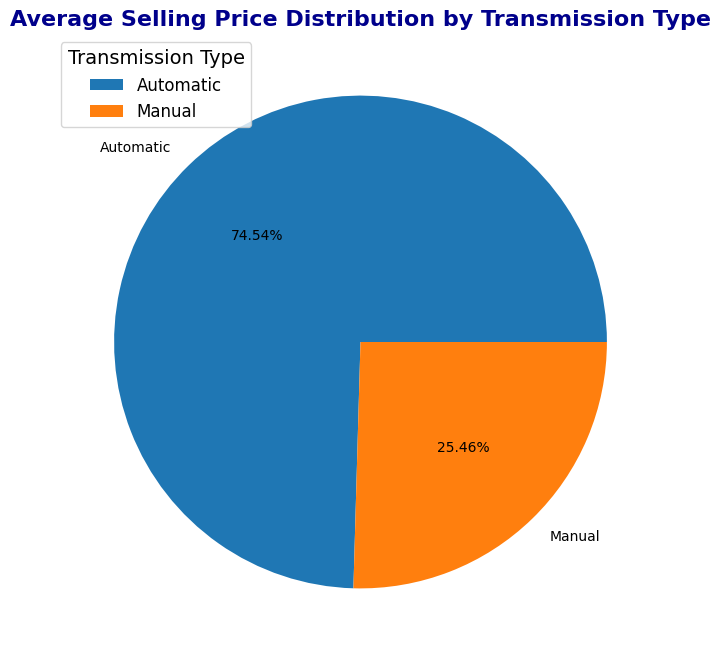

In [193]:
plt.figure(figsize=(12,8))
transmission_avg_price.plot(kind='pie' ,autopct = "%.2f%%"  )
plt.title('Average Selling Price Distribution by Transmission Type', fontsize=16, weight='bold', color='darkblue')
plt.ylabel('')
plt.legend(title='Transmission Type', loc='upper left', fontsize=12, title_fontsize=14)

<ipython-input-194-f117eba90941>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand', data=df_car_numeric_analysis, palette='mako',edgecolor='black', linewidth=1.5 )


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Skoda'),
  Text(2, 0, 'Honda'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Toyota'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Renault'),
  Text(7, 0, 'Mahindra'),
  Text(8, 0, 'Tata'),
  Text(9, 0, 'Chevrolet'),
  Text(10, 0, 'Datsun'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Mercedes-Benz'),
  Text(13, 0, 'Mitsubishi'),
  Text(14, 0, 'Audi'),
  Text(15, 0, 'Volkswagen'),
  Text(16, 0, 'BMW'),
  Text(17, 0, 'Nissan'),
  Text(18, 0, 'Lexus'),
  Text(19, 0, 'Jaguar'),
  Text(20, 0, 'Land'),
  Text(21, 0, 'MG'),
  Text(22, 0, 'Volvo'),
  Text(23, 0, 'Daewoo'),
  Text(24, 0, 'Kia'),
  Text(25, 0, 'Fiat'),
  Text(26, 0, 'Force'),
  Text(27, 0, 'Ambassador'),
  Text(28, 0, 'Ashok'),
  Text(29, 0, 'Isuzu'),
  Text(30, 0, 'Opel')])

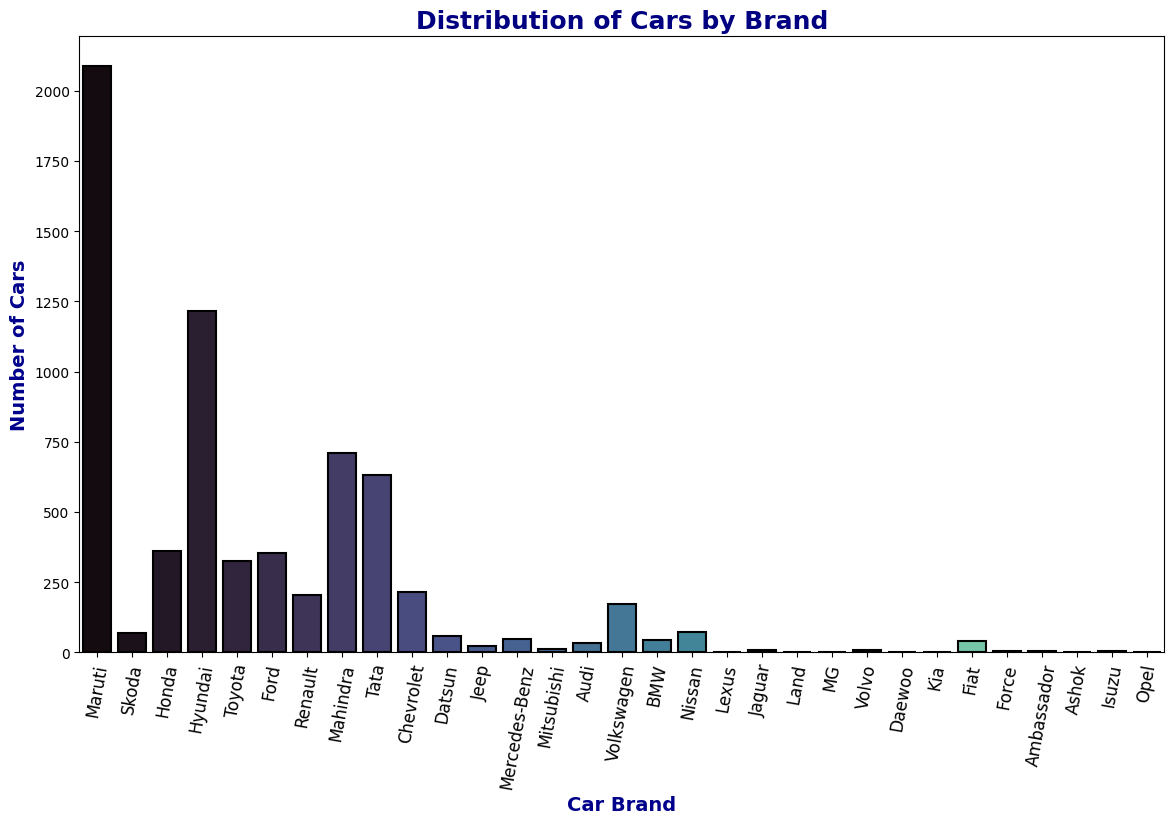

In [194]:
plt.figure(figsize=(14,8))
sns.countplot(x='brand', data=df_car_numeric_analysis, palette='mako',edgecolor='black', linewidth=1.5 )
plt.title('Distribution of Cars by Brand', fontsize=18, weight='bold', color='navy')
plt.xlabel('Car Brand', fontsize=14, weight='bold', color='darkblue')
plt.ylabel('Number of Cars', fontsize=14, weight='bold', color='darkblue')
plt.xticks(rotation=80, fontsize=12)

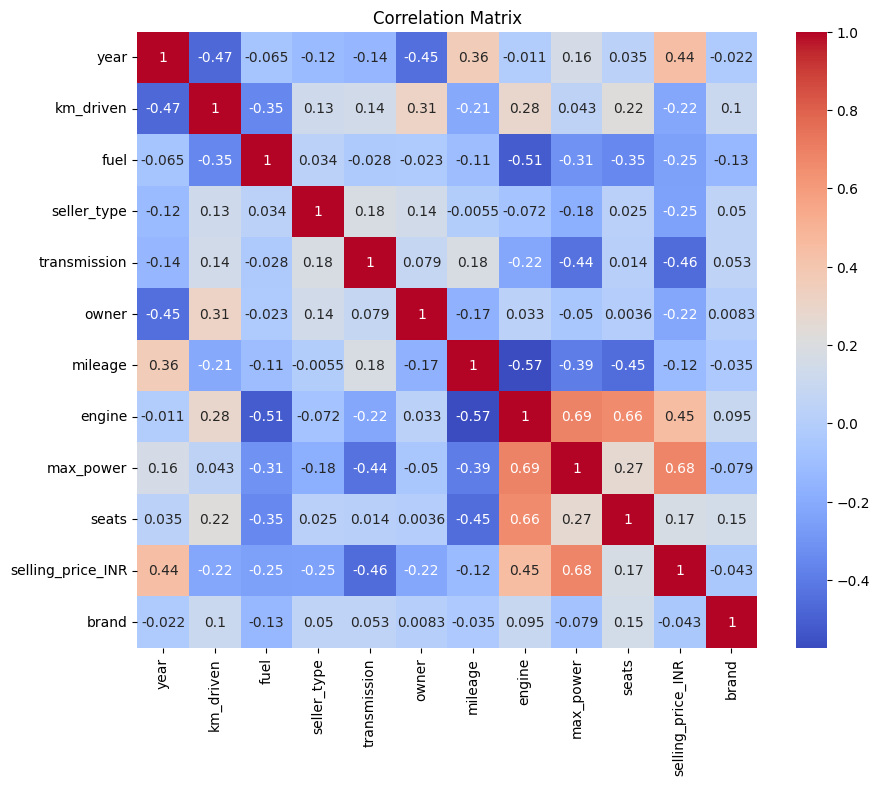

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

# حساب مصفوفة الارتباط
correlation_matrix = df_car_numeric.corr()

# رسم مصفوفة الارتباط
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [196]:
print(df_car_numeric.columns)


Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'mileage', 'engine', 'max_power', 'seats', 'selling_price_INR',
       'brand'],
      dtype='object')


In [197]:
X = df_car_numeric.drop('selling_price_INR', axis=1).values
y = df_car_numeric['selling_price_INR'].values

In [198]:
#from sklearn.preprocessing import StandardScaler

In [199]:
#st = StandardScaler()

In [200]:
#X = st.fit_transform(X)

In [201]:
# ndarray with shape (7906,)
#y = st.fit_transform(y.reshape(-1, 1))

In [202]:
#X

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
df_car_numeric_forest = df_car_numeric

In [206]:
from sklearn.ensemble import RandomForestRegressor


In [207]:
RFR = RandomForestRegressor(n_estimators=100, random_state=42)

In [208]:
RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [209]:
RFR_pred = RFR.predict(X_test)

In [210]:
from sklearn.metrics import mean_squared_error , r2_score

In [211]:
mean_squared_error(y_test, RFR_pred)

14267024308.97905

In [212]:
# حساب R² بين القيم الحقيقية (y_test) و القيم المتوقعة (RFR_pred)
r2 = r2_score(y_test, RFR_pred)

# عرض النتيجة
print(f"R² Score: {r2:.4f}")

R² Score: 0.9200
